# US Accidents Exploratory Analysis

In [1]:
pip install opendatasets -U --quiet


/usr/bin/zsh: /mnt/stor/miniconda/envs/tf/lib/libncursesw.so.6: no version information available (required by /usr/bin/zsh)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark') # change to darkgrid for grid
plt.style.use('dark_background')
plt.figure(figsize=(400, 400))

<Figure size 40000x40000 with 0 Axes>

<Figure size 40000x40000 with 0 Axes>

# Getting the dataset

In [3]:
import opendatasets as od
url='https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(url) # Pre downloaded kaggle.json in the dir

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [4]:
import os 
os.chdir('us-accidents')
x=os.listdir()
df_name=os.getcwd()+ "/"+str([i for i in os.listdir()][0])
print(df_name)
os.chdir('..')

/home/ajdj/clones/exploratory-ds/us-accidents/US_Accidents_March23.csv


# Data preparation and Cleaning

In [5]:
df=pd.read_csv(df_name)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
len(df.ID)

7728394

In [8]:
len(df.columns)

46

In [9]:
numerics=['int16','int32','int64','float16','float32','float64']
num_df=df.select_dtypes(include=numerics)
len(num_df.columns)

13

In [10]:
missing=df.isna().sum().sort_values(ascending=False)/len(df)
missing=missing[missing>0]
print(missing)

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64


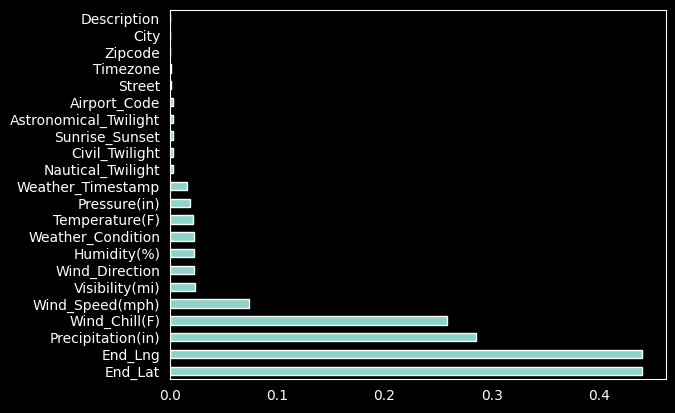

In [11]:

missing=df.isna().sum().sort_values(ascending=False)/len(df)
missing=missing[missing>0]
missing_plot=missing.plot(kind='barh')
missing_plot.figure.savefig('./charts/missing.png')

### Observations
1. Alot of accidents dont have a End pos  
2. 13/46 columns are Numeric 
3. 7728394 records  
4. NY is missing even though it is the city with the highest population  
### From kaggle  
1. Data from 49 states of the US  
### Analysis
1. Many accidents probably were point accidents, and thus do not have an end pos.
2. NY has probably been excluded in the dataset and any results published should mention it 

# Exploratory Analysis  

In [12]:
analysis=['Temperature(F)','Wind_Speed(mph)','Pressure(in)','City','Zipcode']

In [13]:
for i in analysis:
    uniques=len(df[i].unique())
    print(i,uniques)

Temperature(F) 861
Wind_Speed(mph) 185
Pressure(in) 1145
City 13679
Zipcode 825095


In [14]:
df.Start_Time=pd.to_datetime(df.Start_Time,format='mixed')
df.End_Time=pd.to_datetime(df.End_Time,format='mixed')

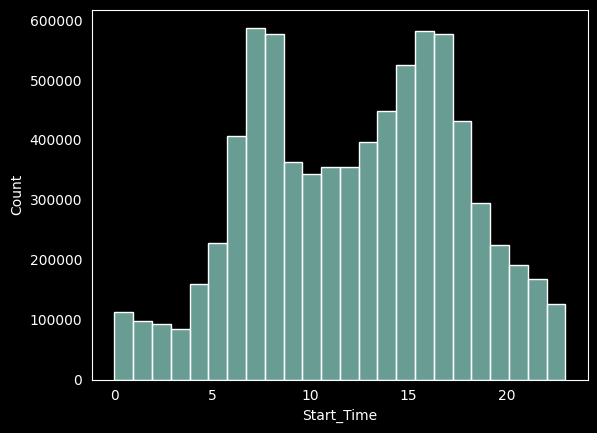

In [15]:
plot=sns.histplot(df.Start_Time.dt.hour,bins=24)
plot.figure.savefig('charts/start_time_by_day')

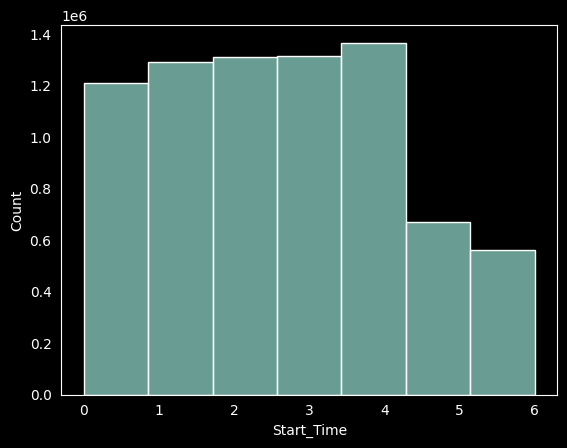

In [16]:
plot=sns.histplot(df.Start_Time.dt.dayofweek,bins=7)
plot.figure.savefig('charts/start_time_by_dayofweek')

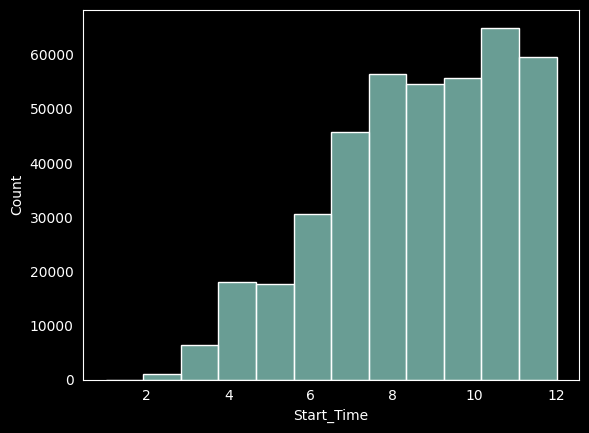

In [17]:
plot=sns.histplot(df[df.Start_Time.dt.year==2016].Start_Time.dt.month,bins=12)
plot.figure.savefig('charts/2016.png')

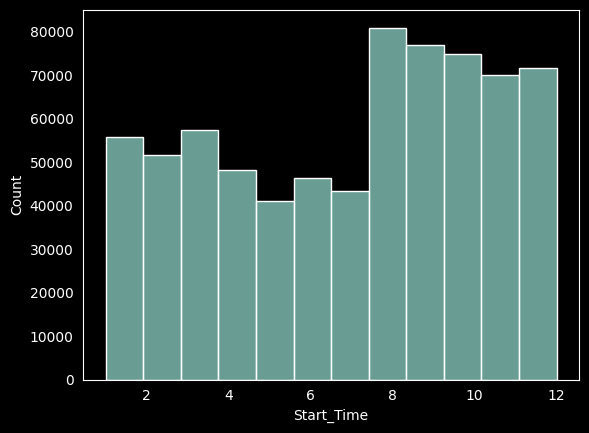

In [18]:
plot=sns.histplot(df[df.Start_Time.dt.year==2017].Start_Time.dt.month,bins=12)
plot.figure.savefig('charts/2017.png')

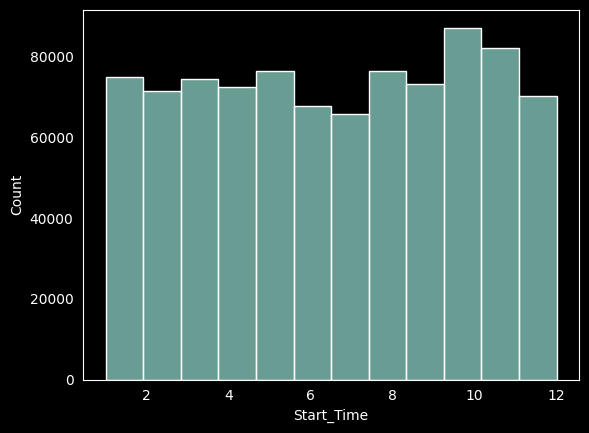

In [19]:
plot=sns.histplot(df[df.Start_Time.dt.year==2018].Start_Time.dt.month,bins=12)
plot.figure.savefig('charts/2018.png')

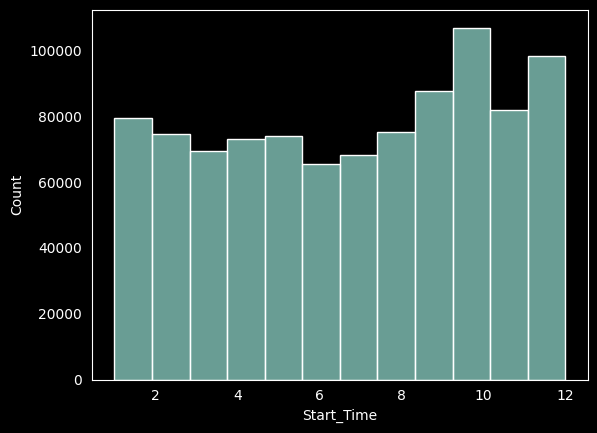

In [20]:
plot=sns.histplot(df[df.Start_Time.dt.year==2019].Start_Time.dt.month,bins=12)
plot.figure.savefig('charts/2019.png')

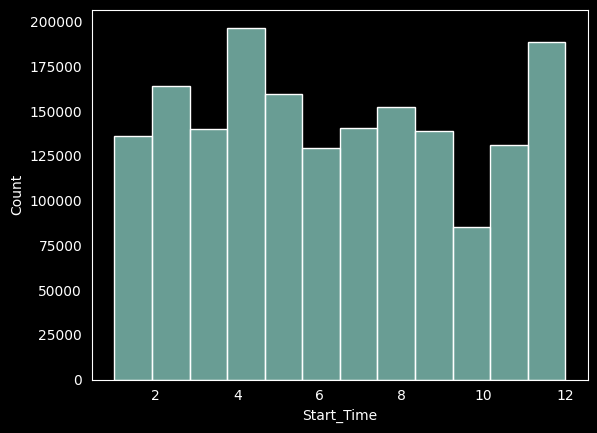

In [21]:
plot=sns.histplot(df[df.Start_Time.dt.year==2022].Start_Time.dt.month,bins=12)
plot.figure.savefig('charts/2022.png')

##### Checking sources

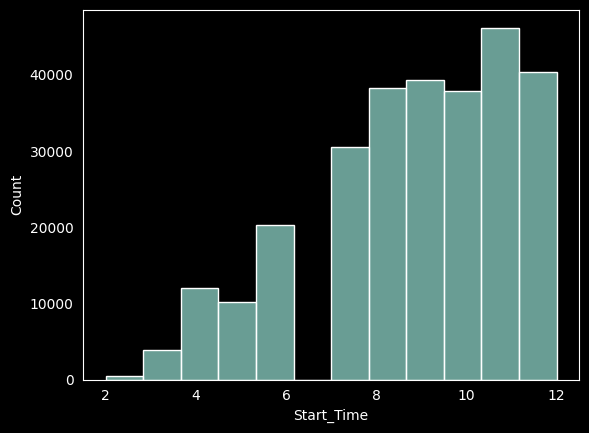

In [22]:
plot=sns.histplot(df[(df.Start_Time.dt.year==2016) & (df.Source=='Source2')].Start_Time.dt.month,bins=12)


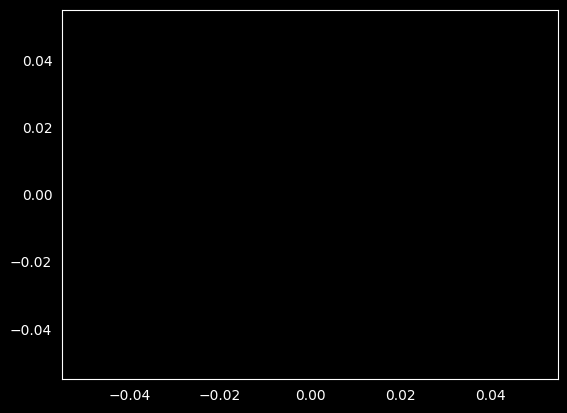

In [23]:
plot=sns.histplot(df[(df.Start_Time.dt.year==2023) & (df.Source=='Source3')].Start_Time.dt.month,bins=12)

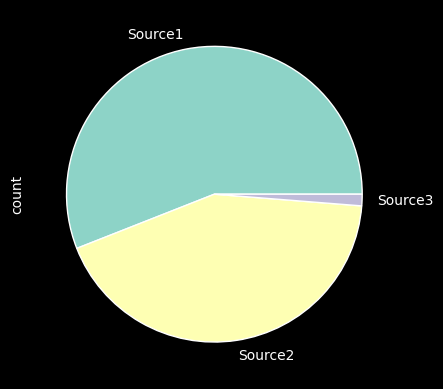

In [24]:
plot=df.Source.value_counts().plot(kind='pie')
plot.figure.savefig('charts/sources.png')

### Observations
1. Most accidents occour betwen 6-9 am and 3-6 pm
2. Most accidents occour on Friday
3. Least accidents occour on the weekends
4. Data for first half of 2016 is incomplete
5. Data for 2023 Feb
6. Source 2,3 Dont contain any data for 2023
7. Source 2,3 Dont contain any data for July 2016
8. Majority of data comes from Source 1
### From kaggle
1. The dataset only contains data from 2016 Feb->2023 March
### Analysis
1. The times 7-8 am,5-6 pm are rush hours where people go to and from work 
2. People do not go to work on the weekend and drive more leisurely thus reducing accidents
3. Maybe data collection was not done well in 2016 and 2023, keeping this data may led to the model being skewed towards the lower half of the year
4. Data sources 2,3 can be dropped for 2023 and 2016 to avoid false inference

In [25]:
accidents_by_city=df.City.value_counts().sort_values(ascending=False)

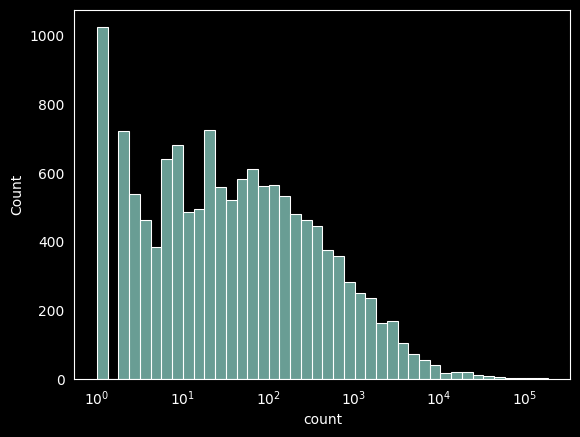

In [26]:
plot=sns.histplot(accidents_by_city,log_scale=True)
plot.figure.savefig('charts/accidents_by_city')

In [27]:
high_accident_cities=accidents_by_city[accidents_by_city>1000]
low_accident_cities=accidents_by_city[accidents_by_city<1000]

In [28]:
low_accident_cities=low_accident_cities[low_accident_cities>0]


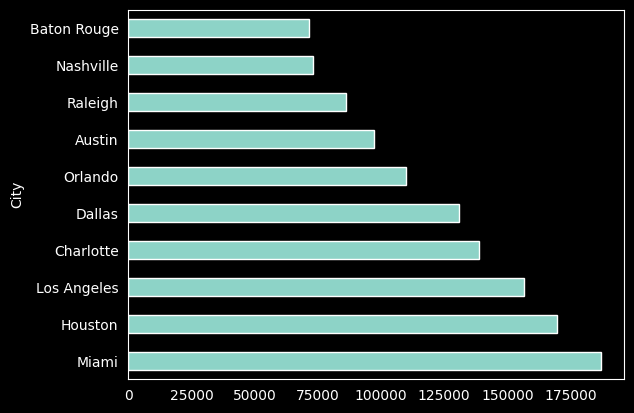

In [29]:
plot=high_accident_cities.sort_values(ascending=False)[:10].plot(kind='barh')
plot.figure.savefig('charts/greater_than_10_cities_by_accident')

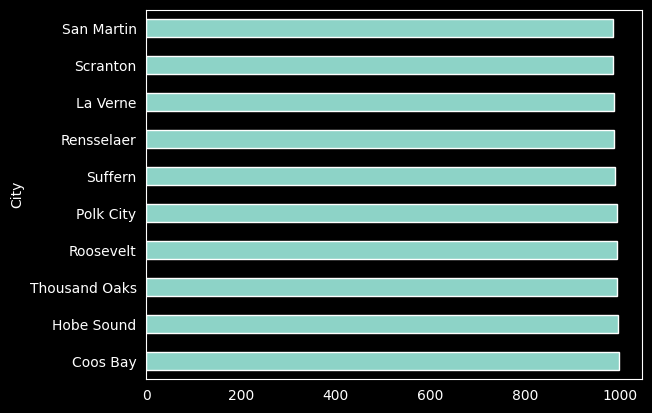

In [30]:
plot=low_accident_cities.sort_values(ascending=False)[:10].plot(kind='barh')
plot.figure.savefig('charts/less_than_10_cities_by_accident')

# Lattitude analysis 

In [31]:
df.Start_Lat[:3]

0    39.865147
1    39.928059
2    39.063148
Name: Start_Lat, dtype: float64

In [32]:
df.Start_Lng[:3]

0   -84.058723
1   -82.831184
2   -84.032608
Name: Start_Lng, dtype: float64

In [33]:
sns.set_style('darkgrid')
'''
plot=sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat,size=0.001)
plot.figure.savefig('charts/map.png')
'''

"\nplot=sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat,size=0.001)\nplot.figure.savefig('charts/map.png')\n"

In [34]:
sample=df.sample(int(len(df)/1000))

In [35]:
import folium
map=folium.Map(tiles="cartodb positron")
from folium.plugins import HeatMap
HeatMap(zip(sample.Start_Lat,sample.Start_Lng)).add_to(map)

In [36]:
map

In [37]:
map_html = map._repr_html_()
with open("charts/map.html",'a') as fh:
    fh.writelines(map_html)

## Conclusions
1. No data for NY  
2. Most accidents in Miami 

# Temperature analysis

In [38]:
name='Temperature(F)'
temps=df.loc[:,name]
temps[:5]

0    36.9
1    37.9
2    36.0
3    35.1
4    36.0
Name: Temperature(F), dtype: float64

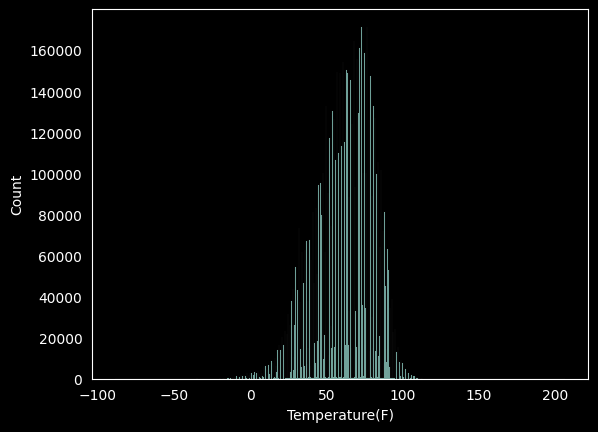

In [39]:
sns.set_style('dark')
plt.style.use('dark_background')
plot=sns.histplot(temps)
plot.figure.savefig("charts/temps.png")

What is the random data at -20F??

### Observations
1. Most accidents occour at 60-80F

# State analysis

In [40]:
# Static import of state names to reduce time usage
states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
states_by_accidents=df.State.value_counts().sort_values(ascending=False)

In [41]:
df.State.unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

In [42]:
vc=df.State.value_counts()
for i in vc.index:
    if i=='NY':
        print('NY:',vc[i])

NY: 347960


NY is in the dataset but none of the top 10 cities are in NY not even NYC??  
even though NYC is the biggest city in the US

In [43]:
for state in states:
    if state not in df.State.unique():
        print(state)

AK
HI


Arkansas and Hawaii are excluded from the dataset  
Why is NY not here?

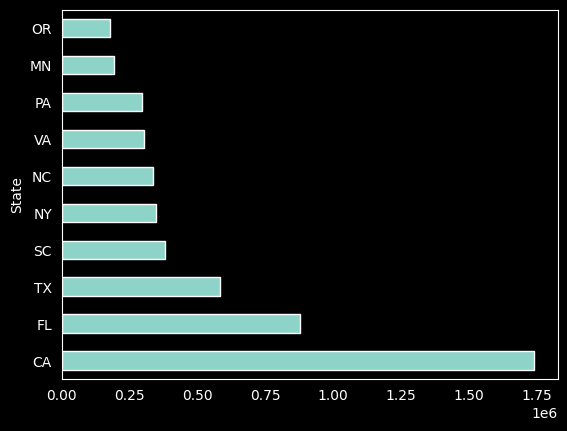

In [44]:
plot=states_by_accidents[:10].plot(kind='barh')
plot.figure.savefig('charts/top_10_states_by_accident')

NY shows up as a state in the top 10?

In [45]:
df_ny=df[df.State=='NY']

In [46]:
len(df_ny)

347960

<Axes: ylabel='City'>

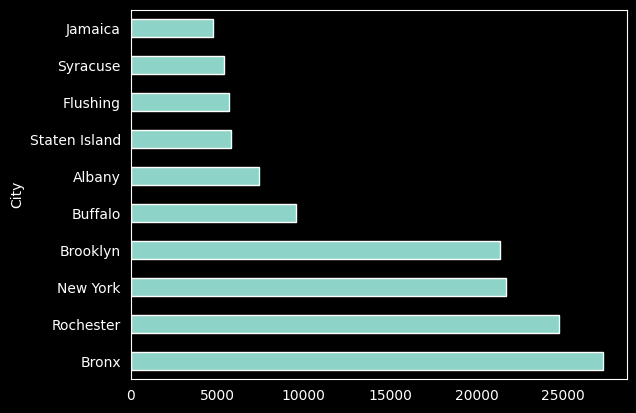

In [47]:
df_ny.City.value_counts()[:10].plot(kind='barh')

<Axes: xlabel='City'>

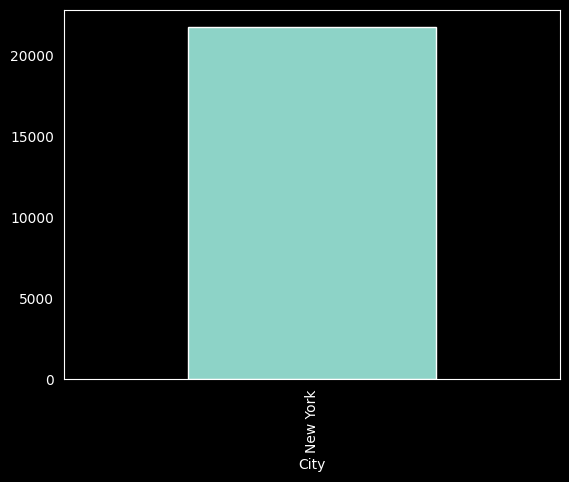

In [48]:
plot=high_accident_cities.sort_values(ascending=False)[high_accident_cities.index=='New York'].plot(kind='bar')
plot

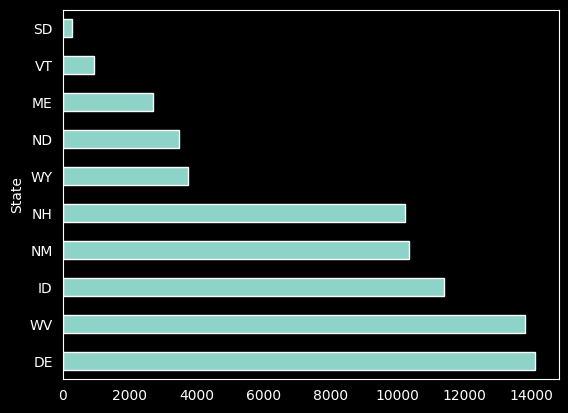

In [49]:
plot=states_by_accidents[-10:].plot(kind='barh')
plot.figure.savefig('charts/bottom_10_states_by_accident')

### Observations
1. NY is present in the data and so is NYC (New york city)  
2. It is just that NYC has a very low accident rate compared to other cities in the data  
### Analysis
1. This does not seem accuracte, According to external sources NY is ranked in the top 15.  
In our data it does not even rank top 30. This needs to be investigated